<a href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td align="left">
  <a target="_blank" href="https://dimitriskogias.wixsite.com/spacecowboy" style="text-decoration: none; display: flex; align-items: center; color: white; background-color: purple; padding: 10px; border-radius: 5px;">
      <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;" />
      <span>Visit my Webpage</span>
    </a>
  </td>
</table>



<table align="left">
  <td align="left"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; border-radius: 5px;">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on GitHub</a></td>
</table>


<h1 align='center'> <b>Computer Vision with the MNIST database of handwritten digits </b>
</h1>

<p>The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. It is a good database for implementing Machine Learning and Neural Network methods while spending minimal efforts on preprocessing and formatting.
I will train ML and DL models using the handwritten digits and their labels from MNIST as training data so that they recognize unseen handwritten digits. </p>
<p>METHODS IMPLEMENTED:
<ul>
    <li> <b>Supervised Learning</b>
    <ul>
        <li> Logistic Regression
        <li> K-Nearest Neighbours
        <li> Support Vector Machines
        <li> Decision Tree Classifier
    </ul>
    <li> <b>Unsupervised Learning</b>
    <ul>
        <li> KMeans
        <li> t-SNE
        <li> Semisupervised Learning
    </ul>
    <li> <b>Neural Networks</b>
    <ul>
        <li> Fully Connected Layer Model
        <li> Convolutional Neural Network Model
    </ul>
</ul>
<p>

In [1]:
# Dataset
from tensorflow.keras.datasets import mnist

# Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from tqdm import tqdm
import time

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

# Neural Networks
import tensorflow as tf
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
# Loading the dataset this way because it is a tuple of two tuples with images in array format.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


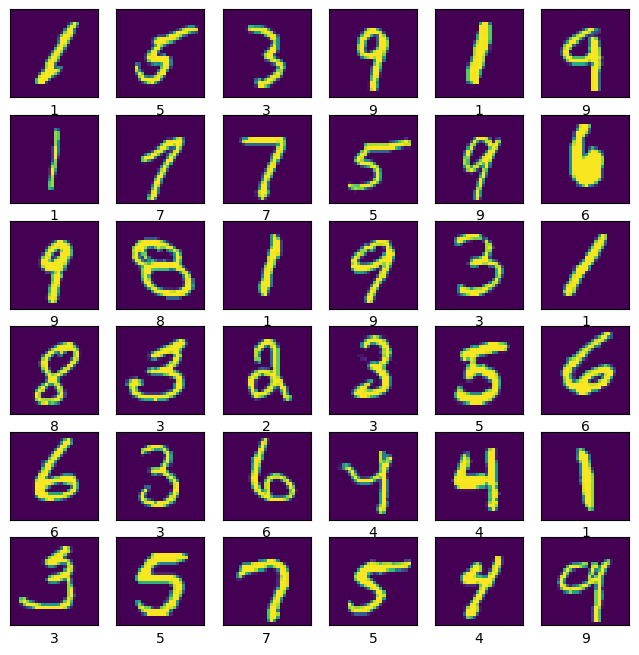

In [3]:
plt.figure(figsize=(8,8))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(train_images[image_ind])#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

<h2> Supervised Learning </h2>
<a id="LR"></a>  
    <ul>
        <li> Logistic Regression
        <li> K-Nearest Neighbours
        <li> Support Vector Machines
        <li> Decision Tree Classifier
    </ul>

In [4]:
models = {'Logistic Regression':LogisticRegression(max_iter=10000),
          'K Nearest Neighbours':KNeighborsClassifier(),
          'Support Vector Machines':SVC(),
          'Decision Tree':DecisionTreeClassifier()
             }
scores = ['accuracy']#'balanced accuracy','f1']
results = pd.DataFrame(columns=list(models.keys()),index=scores)

In [5]:
# You just use a sample of the data, otherwise it takes too long.
N = int(len(train_images)/6)
n = int(len(test_images)/6)
start_time = time.time()
print(f'For {N} training samples and {n} test samples')
for model_name in tqdm(models,desc="Model Progress"):
    model = models[model_name]
    model.fit(train_images[:N].reshape(-1,28*28)/255, train_labels[:N])
    predictions = model.predict(test_images[:n].reshape(-1,28*28)/255)
    results.loc['accuracy',model_name] = accuracy_score(test_labels[:n],predictions)
end_time = time.time()
execution_time = end_time - start_time

print("\nExecution Time:", round(execution_time,2),'secs')
results.transpose()

For 10000 training samples and 1666 test samples


Model Progress: 100%|██████████| 4/4 [01:00<00:00, 15.09s/it]


Execution Time: 60.36 secs


,accuracy
Logistic Regression,0.871549
K Nearest Neighbours,0.919568
Support Vector Machines,0.941777
Decision Tree,0.777311


<h2> Supervised Learning </h2>
<a id="LR"></a>  
    <ul>
        <li> Neural Networks
        <ul>
            <li> Fully Connected Layers
            <li> Convolutional Neural Networks
        </ul>
    </ul>

In [6]:
# These commands are to make the inputs suitable for neural network models
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_labels = (test_labels).astype(np.int64)

# Or I can use array = array.reshape(-1, 28, 28, 1) / 255.0).astype(np.float32)

In [7]:
# A function for a fully connected layer
def fully_connected_model():
    fc_model = tf.keras.Sequential([
        # I flatten the input so that it can be fed into the model
        tf.keras.layers.Flatten(),
        # Activation function for the first fully connected (Dense) layer
        tf.keras.layers.Dense(128, activation= 'sigmoid'),
        # Second Dense layer that outputs the probability distribution across the 10 classes (0 to 9)
        tf.keras.layers.Dense(10, activation= 'softmax')
    ])
    return fc_model

model = fully_connected_model()
#model.predict(train_images[[0]])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training is in batches of 64 images
BATCH_SIZE = 64
# All the precedure is repeated 5 times
EPOCHS = 5
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = model.evaluate(test_images, test_labels)
results['fully connected model'] = test_acc
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.4108 - accuracy: 0.8819
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2271 - accuracy: 0.9334
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1733 - accuracy: 0.9494
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1408 - accuracy: 0.9595
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9644
Test accuracy: 0.9643999934196472


In [9]:
# A Convolutional Neural Network, CNN
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Convolutional Layer 1 with 24 filters
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu ),
        # Max pooling layer 1
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # Convolutional Layer 2 with 36 filters
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu ),
        # Max pooling layer 2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # Final Dense layer must output probabilities so softmax.
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return cnn_model

cnn_model = build_cnn_model()
# Some data through to initiatem cnn_mocel
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

1/1 [==============================] - 0s 238ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [10]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5), #Adam with 1e-3 was also good # Hanging indent style
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
# You train the CNN model, with the same batch_size and number of epochs used previously.
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

# I test the models accuracy with test data
test_loss, test_acc = cnn_model.evaluate(test_images,test_labels)
results['cnn model'] = test_acc
print('Test accuracy:', test_acc)
print('Much better that a standard fully connected layer')

Epoch 1/5
938/938 [==============================] - 37s 39ms/step - loss: 0.3399 - accuracy: 0.8921
Epoch 2/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0714 - accuracy: 0.9771
Epoch 3/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 36s 39ms/step - loss: 0.0404 - accuracy: 0.9870
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0541 - accuracy: 0.9826
Test accuracy: 0.9825999736785889
Much better that a standard fully connected layer


Let's check an output of the NN.
1/1 [==============================] - 0s 89ms/step

This is how an output looks. It is 10 values of probabilities. 
 [1.0000000e+00 6.0781329e-14 3.0346459e-10 8.4023587e-13 1.2961781e-12
 6.7147884e-11 2.9413554e-08 1.1850909e-10 1.6953253e-10 4.0985598e-10]

Element with idx= 0 has max probability= 1.0

Here is the image of the digit as well.


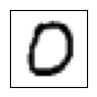

In [11]:
rand_num = 10
print('Let\'s check an output of the NN.')
predictions = cnn_model.predict(test_images[[rand_num]])
print('\nThis is how an output looks. It is 10 values of probabilities. \n',predictions[0])
print('\nElement with idx=',np.argmax(predictions[0]),'has max probability=',predictions[0][np.argmax(predictions[0])])
print('\nHere is the image of the digit as well.')
plt.figure(figsize=(1,1))
plt.imshow(np.squeeze(test_images[[rand_num]]), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
print('Here are the final results from all models.\n')
print(results.transpose())

Here are the final results from all models.

                         accuracy
Logistic Regression      0.871549
K Nearest Neighbours     0.919568
Support Vector Machines  0.941777
Decision Tree            0.777311
fully connected model      0.9644
cnn model                  0.9826


<h2> Unsupervised Learning </h2>
    <ul>
        <li> KMeans
        <li> t-SNE
    </ul>

for km_label in range(n_clusters):
    lst = []
    for i in np.where(kmeans.labels_==km_label)[0]:
        lst.append(y[i])
    label = round(sum(lst)/len(lst))
    print(label)

for km_label in range(50):
  array = np.array([y[i] for i in np.where(kmeans.labels_==km_label)[0]])
  label = round(array.mean())
  print(label)

for i in range(5):
    dummy_list = []
    for j,true_label in enumerate(y):
        if  == kmeans_label:
            dummy_list.append(kmeans.cluster_)
    cl_list[i] = dummy_list

<h2> T-distributed stochastic Neighbor Embedding </h2>

In [13]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300 )
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X = (train_images.reshape(-1,28*28)/255)[:20000]
y = train_labels[:20000]
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame({'tsne_x': X_tsne[:, 0], 'tsne_y': X_tsne[:, 1], 'label': y})

It is very interesting to see that 4s are close to 9s and on the contrary 0s are far away from 7s and so on.


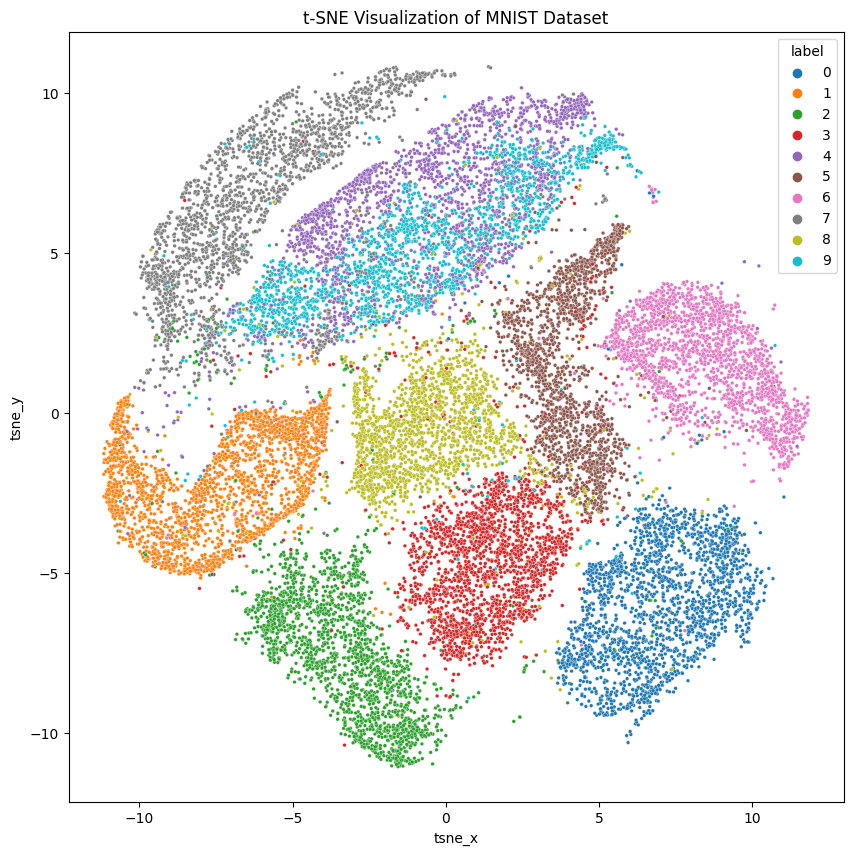

In [14]:
plt.figure(figsize=(10,10))
print('It is very interesting to see that 4s are close to 9s and on the contrary 0s are far away from 7s and so on.')
sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='label', palette='tab10', s=7)
plt.title('t-SNE Visualization of MNIST Dataset')
plt.show()


<h3>Let's suppose we had only a <b>small percentage (5%) of labeled instances</b> and the rest were unlabeled. Is it possible then <b>train a model</b> using only the few labeled instances and the rest of the unlabeled instances??? Of course it is, <b>using KMeans and Label Propagation</b>.</h3>

<h1>Using KMeans clustering for semisupervised learning</h1>



X = train_images.reshape(-1,28*28)/255
y = train_labels
N = 10000
n_clusters = 50
X_lb = X[:N]
y_lb = y[:N]
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(X_lb)

center_to_label = [round(np.array([y_lb[i] for i in np.where(kmeans.labels_==km_label)[0]]).mean()) for km_label in range(n_clusters)]

X_unlb = X[N:]
y_unlb = y[N:]
def euklidean_distance(A,B):
    return np.sqrt(np.sum((A-B)**2,axis=1))
for i in np.arange(1,30):
    distances_from_clusters = euklidean_distance(X_unlb[i], kmeans.cluster_centers_)
    center_id_with_minimum_distance = np.argmin(distances_from_clusters)
    print(center_to_label[center_id_with_minimum_distance],y_unlb[i])

In [15]:
from sklearn.model_selection import train_test_split
# For a smaller sample size
sample_size = 5120
# This should be a perfect square for the code to work without tuning
labeled_size = 256
X_s, y_s = train_test_split(X, y, stratify = y, test_size=sample_size, random_state=1991)[1::2]
X_train, X_test , y_train, y_test = train_test_split(X_s, y_s, stratify = y_s, test_size=0.2, random_state=1991)
X_unlb, X_lb, y_unlb, y_lb, = train_test_split(X_train, y_train, stratify=y_train,
                                               test_size = labeled_size, random_state=1991)

In [16]:
print(f'Let\'s suppose we have {len(X_lb)} random instances. We can train a suepervised ML model like Log Reg with this dataset.')
lr = LogisticRegression(max_iter=10000, random_state=1991)
print(lr.fit(X_lb, y_lb))
random_score = lr.score(X_test,y_test)
print(f'Accuracy for {len(X_lb)} random instances is', random_score,'which is not good.')

Let's suppose we have 256 random instances. We can train a suepervised ML model like Log Reg with this dataset.
LogisticRegression(max_iter=10000, random_state=1991)
Accuracy for 256 random instances is 0.7919921875 which is not good.


In [17]:
n_clusters = labeled_size
kmeans = KMeans(n_clusters=n_clusters, random_state=1991)
# This function calculates the distances from all clusters' centers
# The following does this :np.sqrt(np.sum((X_train[0]-kmeans.cluster_centers_)**2, axis=1))
distances = kmeans.fit_transform(X_train)
# Indices of digits that are closest to the cluster centers
indices_of_representative_digits = np.argmin(distances, axis=0)
X_repr = X_train[indices_of_representative_digits]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's check the images closest to centers, i.e. the most representative handwritings for the labeled instances.


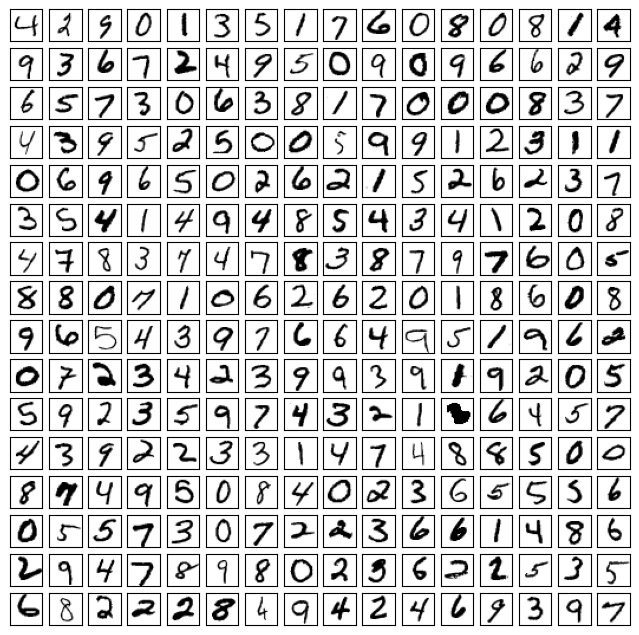

In [18]:
print('Let\'s check the images closest to centers, i.e. the most representative handwritings for the labeled instances.')
plt.figure(figsize=(8,8))
for i in range(n_clusters):
    plt.subplot(int(np.sqrt(n_clusters)),int(np.sqrt(n_clusters)),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_repr[i].reshape(28,28), cmap=plt.cm.binary)

In [19]:
# This is an ideal scenario where you have all the labels so instead of writing down the labels
# You just copied them because you are lazyand to change n_clusters size freely, using this below.
y_repr = y_train[indices_of_representative_digits]
print('Now I can label them by hand. This could very well be a type of ACTIVE LEARNING\
 where the algorithm asks inputs for each digit\'s printed image.\nI do it manually.')
y_repr.reshape(int(np.sqrt(n_clusters)),int(np.sqrt(n_clusters)))
# In a realistic case you just self label the digits.
# THis was for labeled size = 64
#y_repr = np.array([[5, 9, 1, 6, 9, 6, 0, 1],
#                   [9, 7, 9, 2, 9, 0, 2, 0],
#                   [3, 8, 7, 4, 9, 5, 4, 3],
#                   [7, 1, 6, 6, 6, 5, 3, 1],
#                   [5, 9, 1, 2, 5, 0, 2, 2],
#                   [0, 3, 7, 2, 0, 5, 4, 7],
#                   [6, 2, 3, 2, 2, 0, 7, 8],
#                   [6, 9, 8, 3, 4, 8, 9, 0]])

Now I can label them by hand. This could very well be a type of ACTIVE LEARNING where the algorithm asks inputs for each digit's printed image.
I do it manually.


array([[4, 2, 9, 0, 1, 3, 5, 1, 7, 6, 0, 8, 0, 8, 1, 4],
       [9, 3, 6, 7, 2, 4, 9, 5, 0, 9, 0, 9, 6, 6, 2, 9],
       [6, 5, 7, 3, 0, 6, 3, 8, 1, 7, 0, 0, 0, 8, 3, 7],
       [4, 3, 9, 5, 2, 5, 0, 0, 5, 9, 9, 1, 2, 3, 1, 1],
       [0, 6, 9, 6, 5, 0, 2, 6, 2, 1, 5, 2, 6, 2, 3, 7],
       [3, 5, 4, 1, 4, 9, 4, 8, 5, 4, 3, 4, 1, 2, 0, 8],
       [4, 7, 8, 3, 7, 4, 7, 8, 3, 8, 7, 9, 7, 6, 0, 5],
       [8, 8, 0, 7, 1, 0, 6, 2, 6, 2, 0, 1, 8, 6, 0, 8],
       [9, 6, 5, 4, 3, 9, 7, 6, 6, 4, 9, 5, 1, 9, 6, 2],
       [0, 7, 2, 3, 4, 2, 3, 9, 9, 3, 9, 1, 9, 2, 0, 5],
       [5, 9, 2, 3, 5, 9, 7, 4, 3, 2, 1, 3, 6, 4, 5, 7],
       [4, 3, 9, 2, 2, 3, 3, 1, 4, 7, 4, 8, 8, 5, 0, 0],
       [8, 7, 4, 9, 5, 0, 8, 4, 0, 2, 3, 6, 5, 5, 5, 6],
       [0, 5, 5, 7, 3, 0, 7, 2, 2, 3, 6, 6, 1, 4, 8, 6],
       [2, 9, 4, 7, 8, 9, 8, 0, 2, 3, 6, 2, 2, 5, 3, 5],
       [6, 8, 2, 2, 2, 8, 4, 9, 4, 2, 4, 6, 9, 3, 9, 7]], dtype=uint8)

In [20]:
lr = LogisticRegression(max_iter=10000, random_state=1991)
print(lr.fit(X_repr, y_repr))
print(f'Accuracy for {len(X_repr)} labeled most representative instances is',lr.score(X_test,y_test),'which is still not good.')

LogisticRegression(max_iter=10000, random_state=1991)
Accuracy for 256 labeled most representative instances is 0.837890625 which is still not good.


In [101]:
# You propagate the labels to all of the train instances.
# This means that for the 64 ways of writing various digits for which you have groups you
# assign the represantive digits of each group to all the members of the group.
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i,representative_digit in enumerate(y_repr):
    y_train_propagated[kmeans.labels_==i] = representative_digit
# Logistic Regression for propagated labels.
lr = LogisticRegression(max_iter=10000, random_state=1991)
print(lr.fit(X_train, y_train_propagated))
print(f'Accuracy for {n_clusters} ({round(labeled_size*100/sample_size)}% of sample) most representative labels and with label propagation is {round(lr.score(X_test,y_test),4)}.')

LogisticRegression(max_iter=10000, random_state=1991)
Accuracy for 256 (5% of sample) most representative labels and with label propagation is 0.8447.


In [96]:
proximity = 90
X_cluster_distances = distances[np.arange(len(X_train)),kmeans.labels_]
for i in range(n_clusters):
    in_cluster = (kmeans.labels_==i)
    cluster_dist = X_cluster_distances[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, proximity)
    above_cutoff = (X_cluster_distances > cutoff_distance)
    X_cluster_distances[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_distances != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [104]:

lr = LogisticRegression(max_iter=10000, random_state=1991)
print(lr.fit(X_train_partially_propagated, y_train_partially_propagated))


LogisticRegression(max_iter=10000, random_state=1991)
0.8877 accuracy for 256 (5% of sample) most representative labels and with partial label propagation.
It is better than 0.792 for 256 random digit labels and without label propagation.


In [108]:
bs = '\033[1m'
bf = '\033[0m'
print(f'{bs}{round(lr.score(X_test,y_test),4)} accuracy {bf} for {n_clusters} \
({round(labeled_size*100/sample_size)}% of sample) most representative labels \
and with partial label propagation.')
print(f'It is better than {bs}{round(random_score,4)} accuracy {bf} for {n_clusters} random digit \
labels and without label propagation.')

0.8877 accuracy  for 256 (5% of sample) most representative labels and with partial label propagation.
It is better than 0.792 accuracy  for 256 random digit labels and without label propagation.
